In [42]:
from zipfile import ZipFile
import os
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [1]:
zf = ZipFile('data_MNIST.zip', 'r')
zf.extractall()
zf.close()

files = os.listdir('data')
print(files)

['test_images.txt', 'test_labels.txt', 'train_images.txt', 'train_labels.txt']


In [6]:
root = 'data/'

# multimea de antrenare
train_images = np.loadtxt(root + 'train_images.txt')
train_labels = np.loadtxt(root + 'train_labels.txt', 'int')

# multimea de testare
test_images = np.loadtxt(root + 'test_images.txt')
test_labels = np.loadtxt(root + 'test_labels.txt', 'int')

In [7]:
knn = KNeighborsClassifier(5, metric = 'l1')
knn.fit(train_images, train_labels) # fit pe train
knn.score(test_images, test_labels) # score pe test

0.868

In [8]:
knn = KNeighborsClassifier(5, metric = 'l2')
knn.fit(train_images, train_labels) 
knn.score(test_images, test_labels) # l2 este mai bun decat l1

0.896

In [9]:
knn = KNeighborsClassifier(3, metric = 'l1')
knn.fit(train_images, train_labels)
knn.score(test_images, test_labels)  # cu 3 are valoarea cea mai buna si pt l1 si l2 (experimentez valorile)

0.884

In [10]:
knn = KNeighborsClassifier(3, metric = 'l2')
knn.fit(train_images, train_labels) 
knn.score(test_images, test_labels)

0.898

In [46]:
def L1(img, imgs):
# face suma si abs pe fiecare pixel din fiecare img cu axis = 1
    return np.sum(np.abs(img - imgs), axis = 1) # 1 * 768 - 1000 * 768 -> 1000 * 768

def L2(img, imgs):
    return np.sqrt(np.sum(np.power(img - imgs, 2), axis = 1))

class KnnClassifier:
    def __init__(self, train_images, train_labels):
        self.train_images = train_images
        self.train_labels = train_labels
        
    def classify_image(self, test_image, num_neighbors = 3, metric = 'l2'):
        # 1.calculati distanta folosind metric de la test_image la toate train_images -> [201,2001,842,723,....]
        if metric == 'l1':
            dist = L1(test_image, self.train_images)
        else:
            dist = L2(test_image, self.train_images)

        # 2.sortam arrayul de distante crescator pastrand indicii (np.argsort, returneaza indicii in ordinea valorilor sortate)
        indexes = np.argsort(dist)
        
        # 3.luam primii num_neighbours din arrayul sortat -> [3, 3, 2]  
        k_dist = indexes[:num_neighbors]
        
        # 4.numaram clasa dominanta -> 3
        k_classes = self.train_labels[k_dist]
        k_votes = np.bincount(k_classes) #(np.bincount, numara cate aparitii de fiecare valoare exista)
        return np.argmax(k_votes) # (np.argmax, returneaza indicele cu valoarea cea mai mare)
    
    def predict(self, test_images, num_neighbors = 3, metric = 'l2'):
        preds = []
        for test_image in test_images:
            preds.append(self.classify_image(test_image, num_neighbors, metric))
        return preds
    
    def score(self, test_images, test_labels, num_neighbours = 3, metric = 'l2'):
        preds = self.predict(test_images, num_neighbours, metric)
        return (preds == test_labels).mean() # pentru acuratete 
        
knn = KnnClassifier(train_images, train_labels)

# Ex 2  
# clasifică imaginea test_image cu metoda celor mai apropiați vecini
print(knn.classify_image(test_images[9]))

4


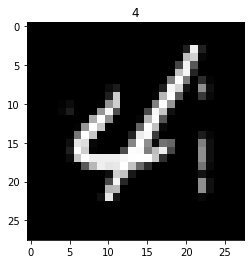

In [44]:
image = test_images[9, :] 
image = np.reshape(image, (28, 28))
plt.title(test_labels[9])
plt.imshow(image.astype(np.uint8), cmap = 'gray')
plt.show()

In [47]:
# Ex 3
# Calculați acuratețea metodei celor mai apropiați vecini pe mulțimea de testare
#   având ca distanța ‘l2’ și numărul de vecini 3.
print(knn.score(test_images, test_labels, num_neighbours = 3, metric = 'l2'))

0.898


In [51]:
# Ex 4
# Calculați acuratețea metodei celor mai apropiați vecini pe mulțimea de testare
# având ca distanța L2 și numărul de vecini ∈ [1, 3, 5, 7, 9].
ks = [1, 3, 5, 7, 9]
acc = [knn.score(test_images, test_labels, num_neighbours = x, metric = 'l2') for x in ks]

In [57]:
acc
np.savetxt('acuratete_l2.txt', acc) # salveaza array-ul acc in fisierul acuratete_l2.txt

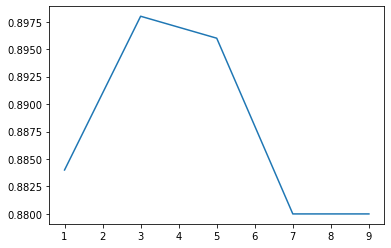

In [53]:
# a. Plotați un grafic cu acuratețea obținuta pentru fiecare vecin
plt.plot(ks, acc)
plt.show()

In [54]:
# b. Repetați punctul anterior pentru distanța L1. Plotați graficul de la
# punctul anterior în aceeași figură cu graficul curent
ks = [1, 3, 5, 7, 9]
acc2 = [knn.score(test_images, test_labels, num_neighbours = x, metric = 'l1') for x in ks]

In [58]:
acc2
np.savetxt('acuratete_l1.txt', acc2) 

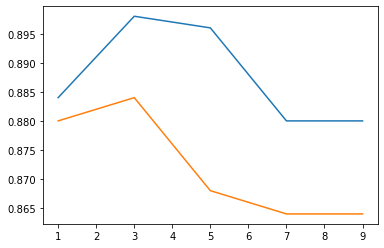

In [56]:
plt.plot(ks, acc)
plt.plot(ks, acc2)
plt.show()